# Projeto Final - Machine Learning
## Helton Souza Lima - helton.souza@dataprev.gov.br

### Exploração dos dados

Primeiro passo deste notebook é fazer a leitura do arquivo consolidado para a criação de um DataFrame Pandas, além dos imports necessários para as outras seções deste notebook. Como forma de visualizar a correta leitura e uma breve amostra do arquivo, conseguimos enxergar as 5 primeiras linhas e algumas colunas. Como são muitas colunas a serem exibidas, várias delas foram ocultadas.

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

data_origin = pd.read_csv('BolsaFamiliaEIndicesSociais_PorMunicipio_2010.csv')

data_origin.head()

,ano,codmun6,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia,uf,codmun7,município,espvida,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,2010,110001,110001,201001,1998,175027.0,11,1100015,ALTA FLORESTA D'OESTE,70.75,...,1602.0,16431.0,24097,22429,368,629,641,526,763,657
1,2010,110002,110002,201001,5268,453317.0,11,1100023,ARIQUEMES,73.36,...,5256.0,60213.0,89766,88730,514,648,702,600,806,716
2,2010,110003,110003,201001,525,51161.0,11,1100031,CABIXI,70.39,...,381.0,4306.0,6303,6156,357,700,650,559,757,650
3,2010,110004,110004,201001,5424,491901.0,11,1100049,CACOAL,74.27,...,4547.0,54356.0,78141,76876,488,698,718,620,821,727
4,2010,110005,110005,201001,1263,109869.0,11,1100056,CEREJEIRAS,72.94,...,1033.0,11786.0,16942,16815,430,712,692,602,799,688


#### Análise individual de variáveis

Para aprofundar um pouco a análise de variáveis, foi realizada uma leitura de todas as descrições das variáveis e algumas delas foram selecionadas para verificação individual, exibindo a quantidade, a média, o desvio-padrão, o valor mínimo, valor máximo e valores que contemplam cada quartil. Abaixo deste resumo, um gráfico exibindo a quantidade de valores.

##### Variável "valor_repassado_bolsa_familia"

In [13]:
data_origin['valor_repassado_bolsa_familia'].describe()

count    5.565000e+03
mean     2.073653e+05
std      5.952418e+05
min      0.000000e+00
25%      3.453700e+04
50%      8.771500e+04
75%      2.111180e+05
max      1.584560e+07
Name: valor_repassado_bolsa_familia, dtype: float64

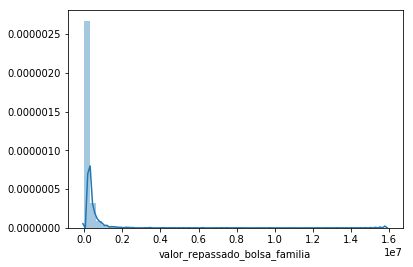

In [14]:
sns.distplot(data_origin['valor_repassado_bolsa_familia'])

##### Variável "qtd_familias_beneficiarias_bolsa_familia"

In [218]:
data_origin['qtd_familias_beneficiarias_bolsa_familia'].describe()

count      5565.000000
mean       2246.234322
std        6741.907804
min           0.000000
25%         412.000000
50%         978.000000
75%        2228.000000
max      181531.000000
Name: qtd_familias_beneficiarias_bolsa_familia, dtype: float64

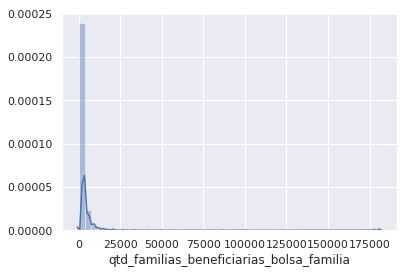

In [219]:
sns.distplot(data_origin['qtd_familias_beneficiarias_bolsa_familia'])

##### Variável "idhm"

In [220]:
data_origin['idhm'].describe()

count    5565.000000
mean      659.157412
std        71.997282
min       418.000000
25%       599.000000
50%       665.000000
75%       718.000000
max       862.000000
Name: idhm, dtype: float64

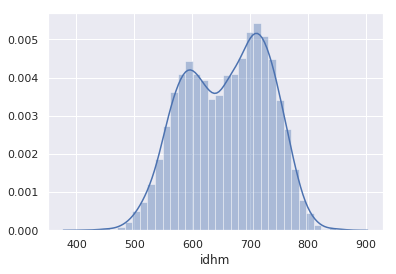

In [221]:
sns.distplot(data_origin['idhm'])

Neste ponto, verificou-se que a variável "idhm" possuía alguns registros com valores muito próximos de zero, indicando que estão fora da distribuição que seria para valores acima de 400.

Em verificação individual destes casos, percebeu-se que os registros estão apenas transformados para valores entre 0 e 1. Por exemplo, para o Município de Cabixi, em Rondônia, o valor que se verificou foi 0,65. Entretanto, o seu IDHM foi avaliado em 650.

Sendo assim, foi necessário realizar a transformação desses casos para que todos fiquem com a mesma base.

O mesmo precisou ser feito para as colunas "idhm_e", "idhm_l" e "idhm_r", que são os índices que compõem diretamente o idhm, sendo respectivamente os índices de Educação, Longevidade e Renda.

Também precisou ser feito para as colunas: "i_freq_prop": Subíndice de frequência escolar - IDHM Educação; "i_escolaridade": Subíndice de escolaridade - IDHM Educação

##### Variável "idhm_e"

In [222]:
data_origin['idhm_e'].describe()

count    5565.000000
mean      559.093980
std        93.327747
min       207.000000
25%       490.000000
50%       560.000000
75%       631.000000
max       825.000000
Name: idhm_e, dtype: float64

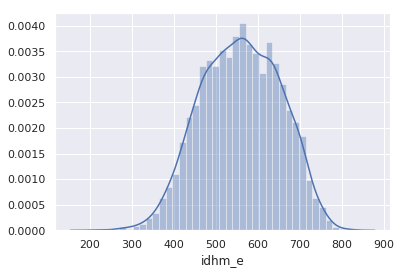

In [223]:
sns.distplot(data_origin['idhm_e'])

##### Variável "idhm_l"

In [224]:
data_origin['idhm_l'].describe()

count    5565.00000
mean      801.56442
std        44.68086
min       672.00000
25%       769.00000
50%       808.00000
75%       836.00000
max       894.00000
Name: idhm_l, dtype: float64

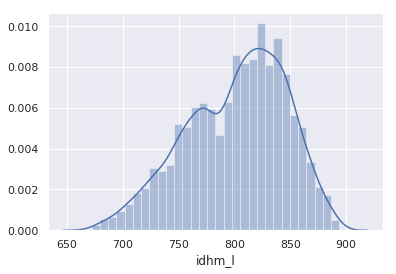

In [225]:
sns.distplot(data_origin['idhm_l'])

##### Variável "idhm_r"

In [226]:
data_origin['idhm_r'].describe()

count    5565.000000
mean      642.873136
std        80.661672
min       400.000000
25%       572.000000
50%       654.000000
75%       707.000000
max       891.000000
Name: idhm_r, dtype: float64

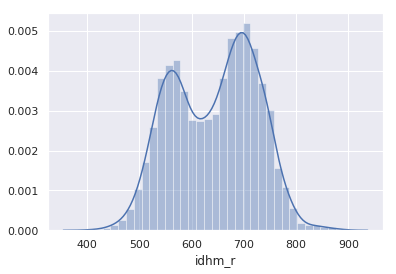

In [227]:
sns.distplot(data_origin['idhm_r'])

Percebe-se que os índices que compõem o IDHM possuem dois picos, exceto o IDHM-E

##### Variável "i_freq_prop": Subíndice de frequência escolar - IDHM Educação

In [228]:
data_origin['i_freq_prop'].describe()

count    5565.000000
mean      668.343935
std        96.125319
min       268.000000
25%       603.000000
50%       670.000000
75%       741.000000
max       962.000000
Name: i_freq_prop, dtype: float64

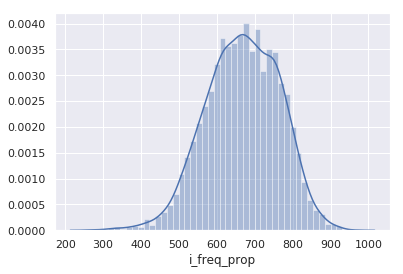

In [229]:
sns.distplot(data_origin['i_freq_prop'])

##### Variável "i_escolaridade": Subíndice de escolaridade - IDHM Educação

In [230]:
data_origin['i_escolaridade'].describe()

count    5565.000000
mean      396.691824
std       105.885127
min       120.000000
25%       315.000000
50%       384.000000
75%       464.000000
max       800.000000
Name: i_escolaridade, dtype: float64

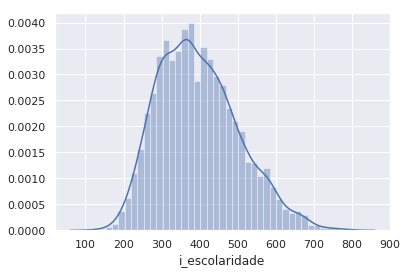

In [231]:
sns.distplot(data_origin['i_escolaridade'])

##### Variável "theil": Índice de Theil - L

In [232]:
data_origin['theil'].describe()

count    5565.000000
mean        0.455695
std         0.130366
min         0.140000
25%         0.360000
50%         0.440000
75%         0.530000
max         1.360000
Name: theil, dtype: float64

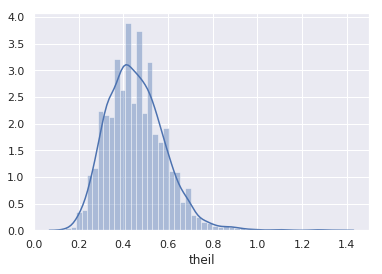

In [233]:
sns.distplot(data_origin['theil'])

##### Variável "gini": Índice de Gini

Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor varia de 0, quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor), a 1, quando a desigualdade é máxima (apenas um indivíduo detém toda a renda).O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

In [234]:
data_origin['gini'].describe()

count    5565.000000
mean        0.494381
std         0.066075
min         0.280000
25%         0.450000
50%         0.490000
75%         0.540000
max         0.800000
Name: gini, dtype: float64

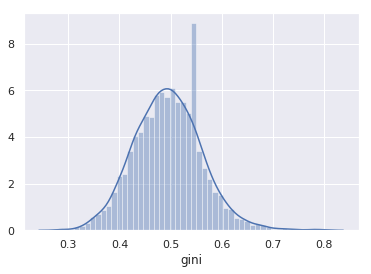

In [235]:
sns.distplot(data_origin['gini'])

##### Variável "pmpob": % de pobres

Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

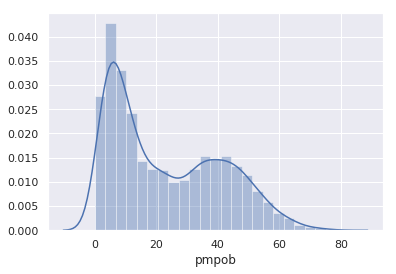

In [236]:
sns.distplot(data_origin['pmpob'])

##### Variável "pind": Proporção de extremamente pobres

Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

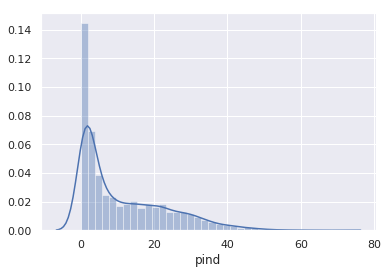

In [237]:
sns.distplot(data_origin['pind'])

In [238]:
data_origin['pesotot'].describe()

count    5.565000e+03
mean     3.427777e+04
std      2.031126e+05
min      8.050000e+02
25%      5.235000e+03
50%      1.093400e+04
75%      2.342400e+04
max      1.125350e+07
Name: pesotot, dtype: float64

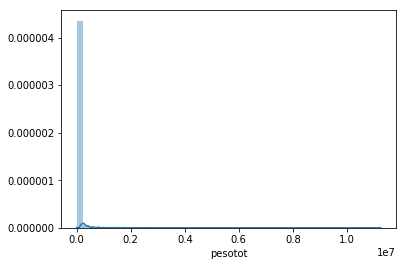

In [36]:
sns.distplot(data_origin['pesotot'])

### Tratamento dos dados

#### Retirando colunas com valores não-numéricos e de códigos pertencentes a domínios

In [248]:
data_clean = data_origin.drop(columns=['ano', 'codmun6', 'ibge', 'anomes', 'uf', 'codmun7', 'município'], axis = 1)

#### Avaliando as variáveis mais significativas

Aplicando o SelectKBest para extrair as 155 variáveis mais significativas e exibindo em ordem de importância

In [250]:
y = data_clean['valor_repassado_bolsa_familia']
X = data_clean.drop(columns=['qtd_familias_beneficiarias_bolsa_familia','valor_repassado_bolsa_familia' ])

bestfeatures = SelectKBest(score_func=chi2, k=155)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variável','Score']  
print(featureScores.nlargest(155,'Score')) 

                  Variável         Score
219                pesourb  7.815349e+09
218                pesotot  6.695882e+09
225                   popt  6.688535e+09
224                    pop  6.639863e+09
220                    pia  5.952901e+09
198                 peso15  5.524917e+09
202                 peso18  5.274507e+09
223                 pia18m  5.268844e+09
206                 peso25  4.524264e+09
189                    pea  3.781480e+09
192                 pea18m  3.730309e+09
188              mulhertot  3.642771e+09
169               homemtot  3.061339e+09
215               pesom15m  3.049914e+09
216               pesom25m  2.547894e+09
200               peso1524  1.033238e+09
211                peso617  9.514329e+08
204               peso1824  7.686514e+08
212                 peso65  6.212915e+08
221                pia1014  4.553444e+08
210                peso610  4.118764e+08
194               peso1114  3.610948e+08
175              mulh25a29  3.549558e+08
176             

#### Avaliando a correlação de variáveis

Utilizando o gráfico de correlação com a intenção de avaliar se há variáveis com forte correlação e podem ser eliminadas do modelo sem perda de informação relevante para a fase de predição.

O gráfico apresenta uma relação um-pra-um de cada variáveis e exibe uma cor indicando o grau de correlação. Quanto mais próximo do valor "1", que é a cor mais clara, mais correlacionadas entre si as variáveis são.

Foi utilizado o método "corr()" do Pandas DataFrame e a visualização em gráfico da biblioteca Seaborn.

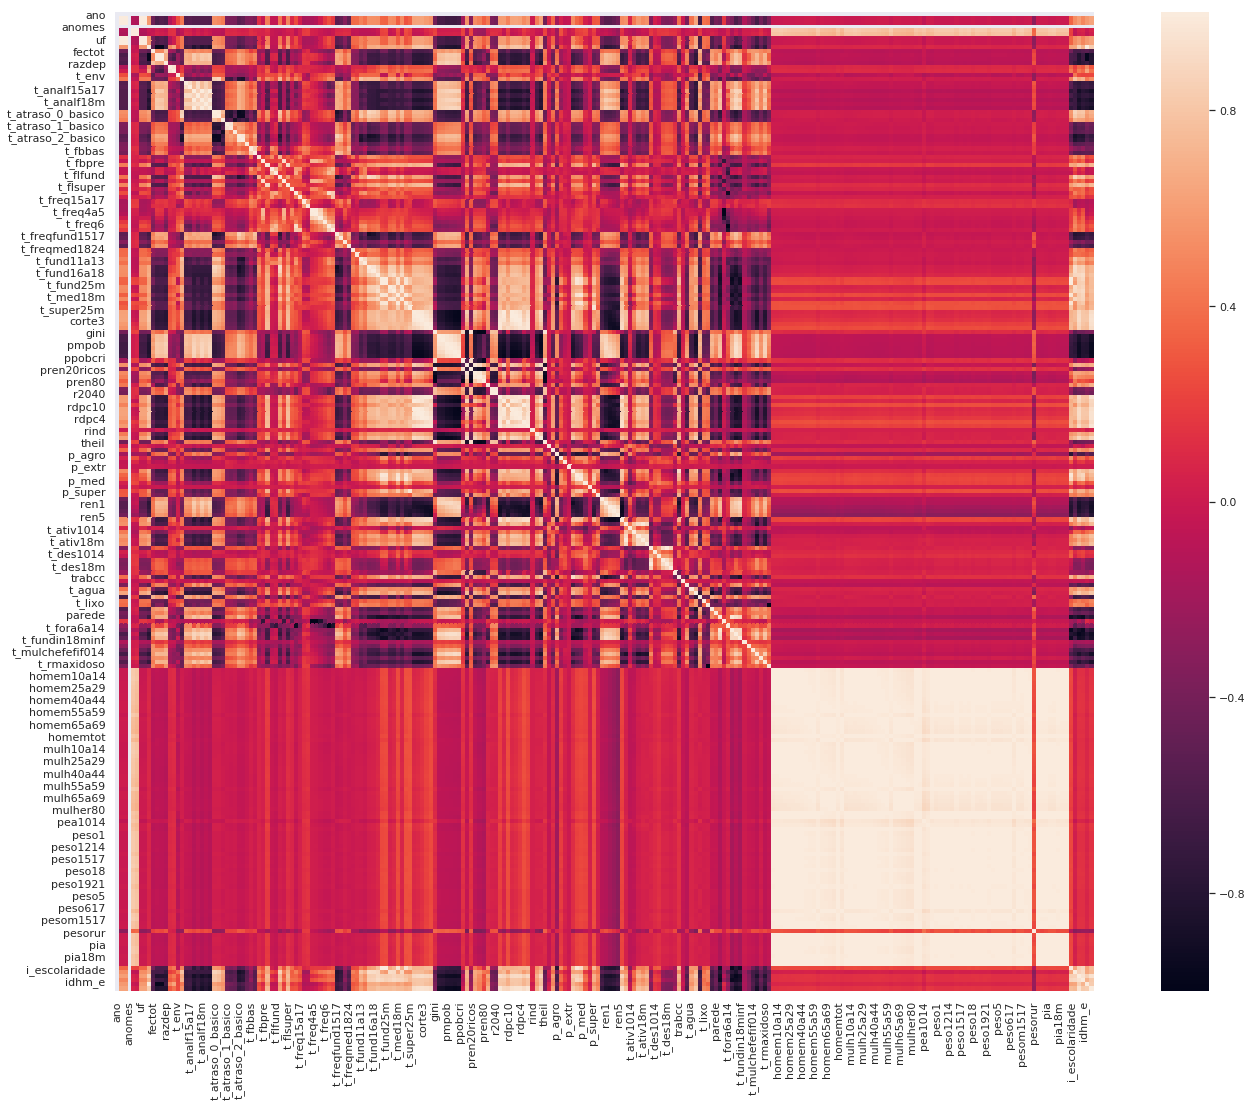

In [246]:
corrmat = data_origin.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

Percebe-se uma forte relação entre as seguintes variáveis:

**
homem10a14
homem25a29
homem40a44
homem55a59
homem65a69
homemtot
mulh10a14
mulh25a29
mulh40a44
mulh55a59
mulh65a69
mulher80
pea1014
peso1
peso1214
peso1517
peso18
peso1921
peso5
peso617
pesom1517
pia
pia18m
**

Sendo assim, é possível proceder com a exclusão dessas variáveis, pois agregam praticamente a mesma informação.

Vamos manter apenas a variável **homemtot**, que significa "População total do sexo masculino"

A seguir, mais algumas iterações deste mesmo processo que não foi possível fazer de uma só vez devido à quantidade de variáveis envolvidas.

In [251]:
data_clean = data_clean.drop(columns=['homem10a14', 'homem25a29', 'homem40a44', 'homem55a59', 'homem65a69', 'mulh10a14', 'mulh25a29', 'mulh40a44', 'mulh55a59', 'mulh65a69', 'mulher80', 'pea1014', 'peso1', 'peso1214', 'peso1517', 'peso18', 'peso1921', 'peso5', 'peso617', 'pesom1517', 'pia', 'pia18m'], axis = 1)

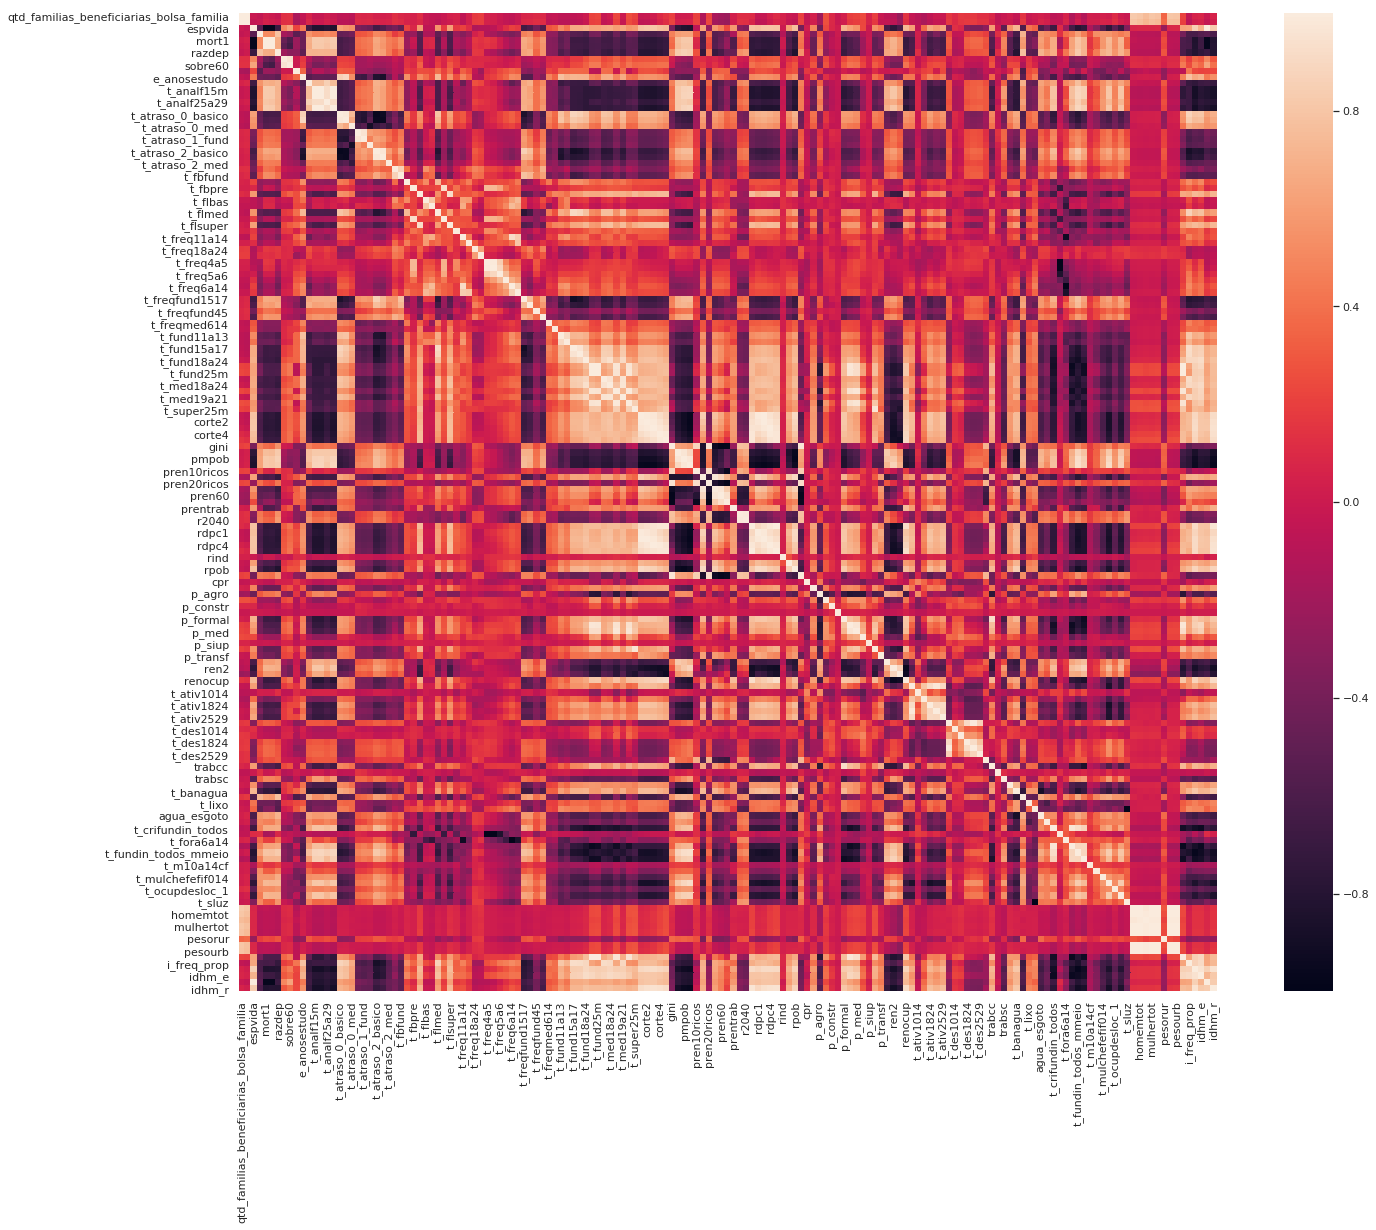

In [244]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

Percebe-se uma forte relação entre as seguintes variáveis:

homem15a19
homem35a39
homem5a9
homem75a79
mulh0a4
mulh30a34
mulh50a54
mulh70a74
pea
peso1114
peso15
peso1820
peso4
peso65
pesourb
pop


Sendo assim, é possível proceder com a exclusão dessas variáveis, pois agregam praticamente a mesma informação.

Vamos manter apenas a variável pesourb, que significa "População residente em área urbana"


In [41]:
data_clean = data_clean.drop(columns=['homem15a19', 'homem35a39', 'homem5a9', 'homem75a79', 'mulh0a4', 'mulh30a34', 'mulh50a54', 'mulh70a74', 'pea', 'peso1114', 'peso15', 'peso1820', 'peso4', 'peso65', 'pop'], axis = 1)

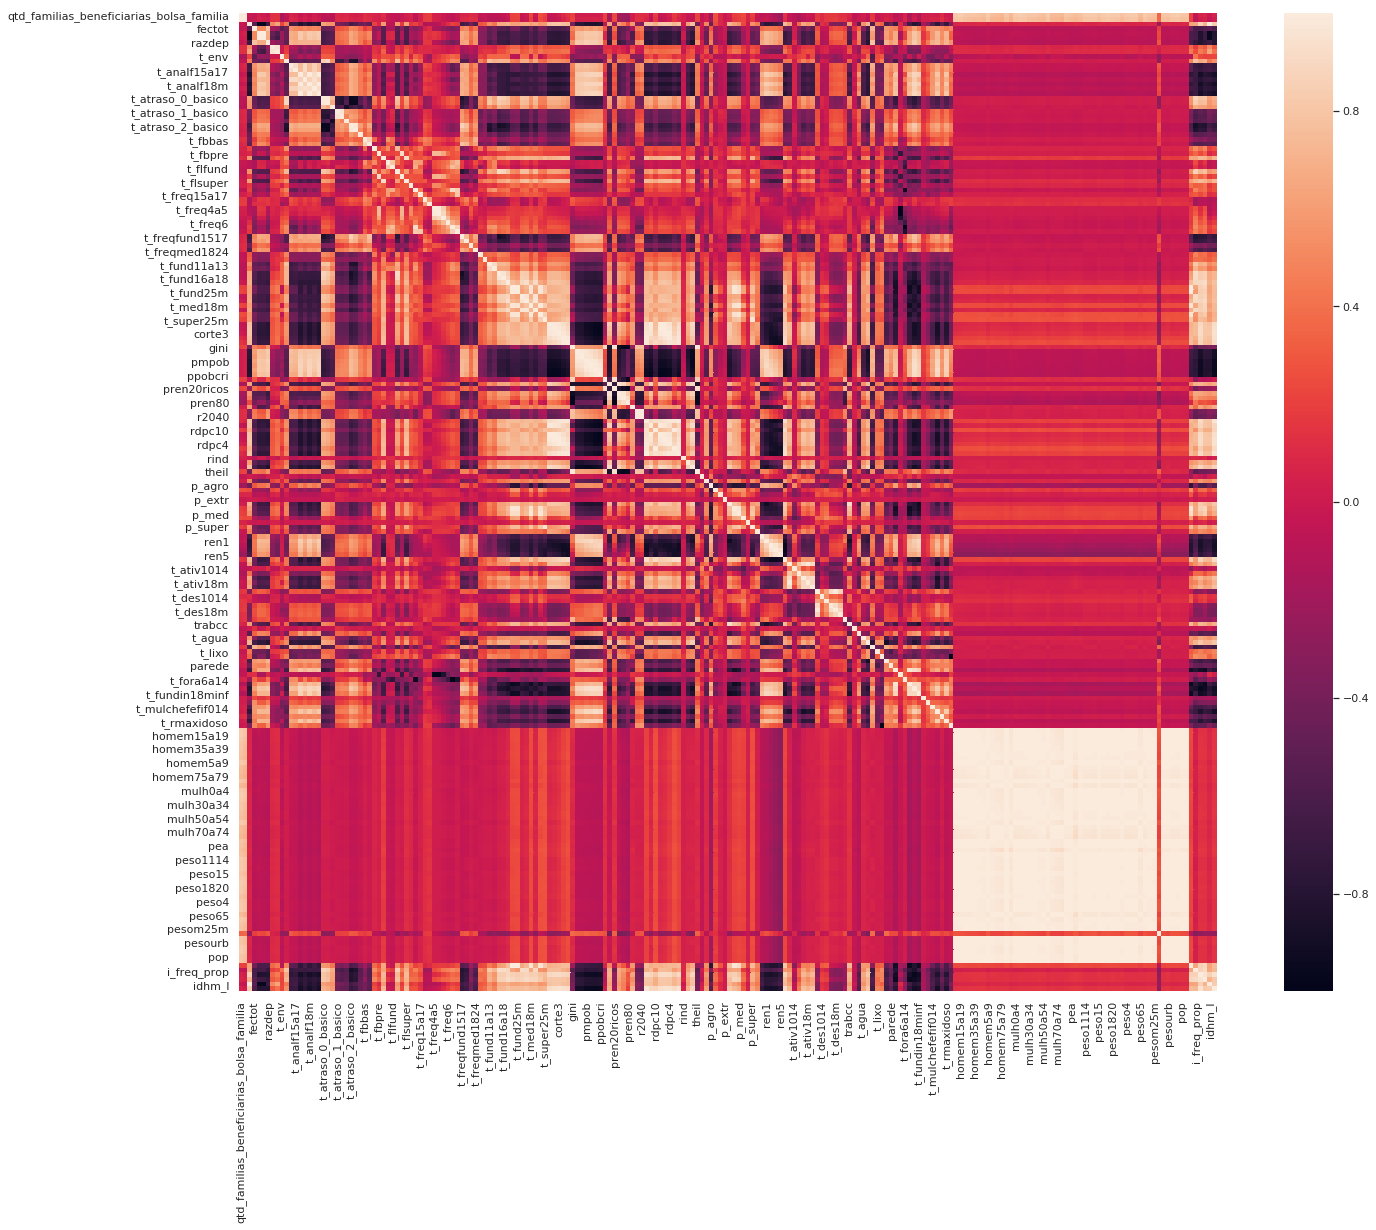

In [252]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

In [253]:
data_clean = data_clean.drop(columns=['homem20a24', 'homem50a54', 'mulh20a24', 'mulh5a9', 'peso1113', 'peso1618', 'peso6', 'pesom15m', 'pia1517'], axis = 1)

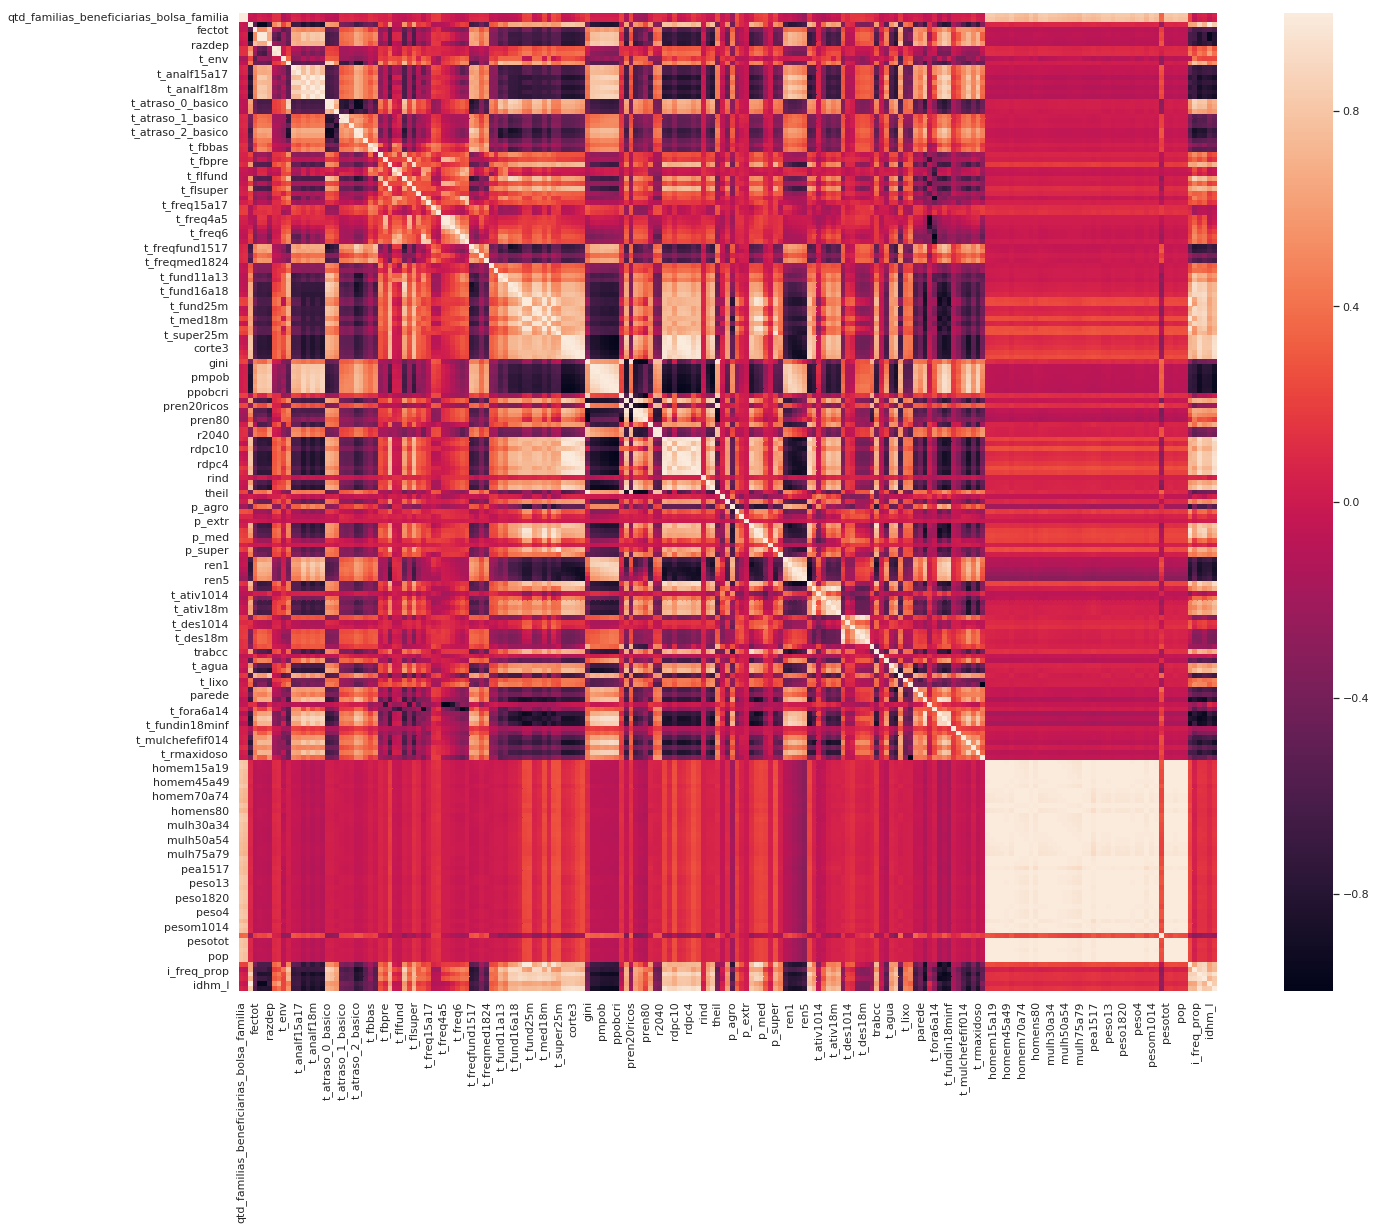

In [254]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

In [255]:
data_clean = data_clean.drop(columns=['homem30a34', 'homem60a64', 'mulh15a19', 'mulh45a49', 'mulh75a79', 'pea1517', 'peso13', 'peso1824', 'peso610', 'pesom25m', 'pia1014'], axis = 1)

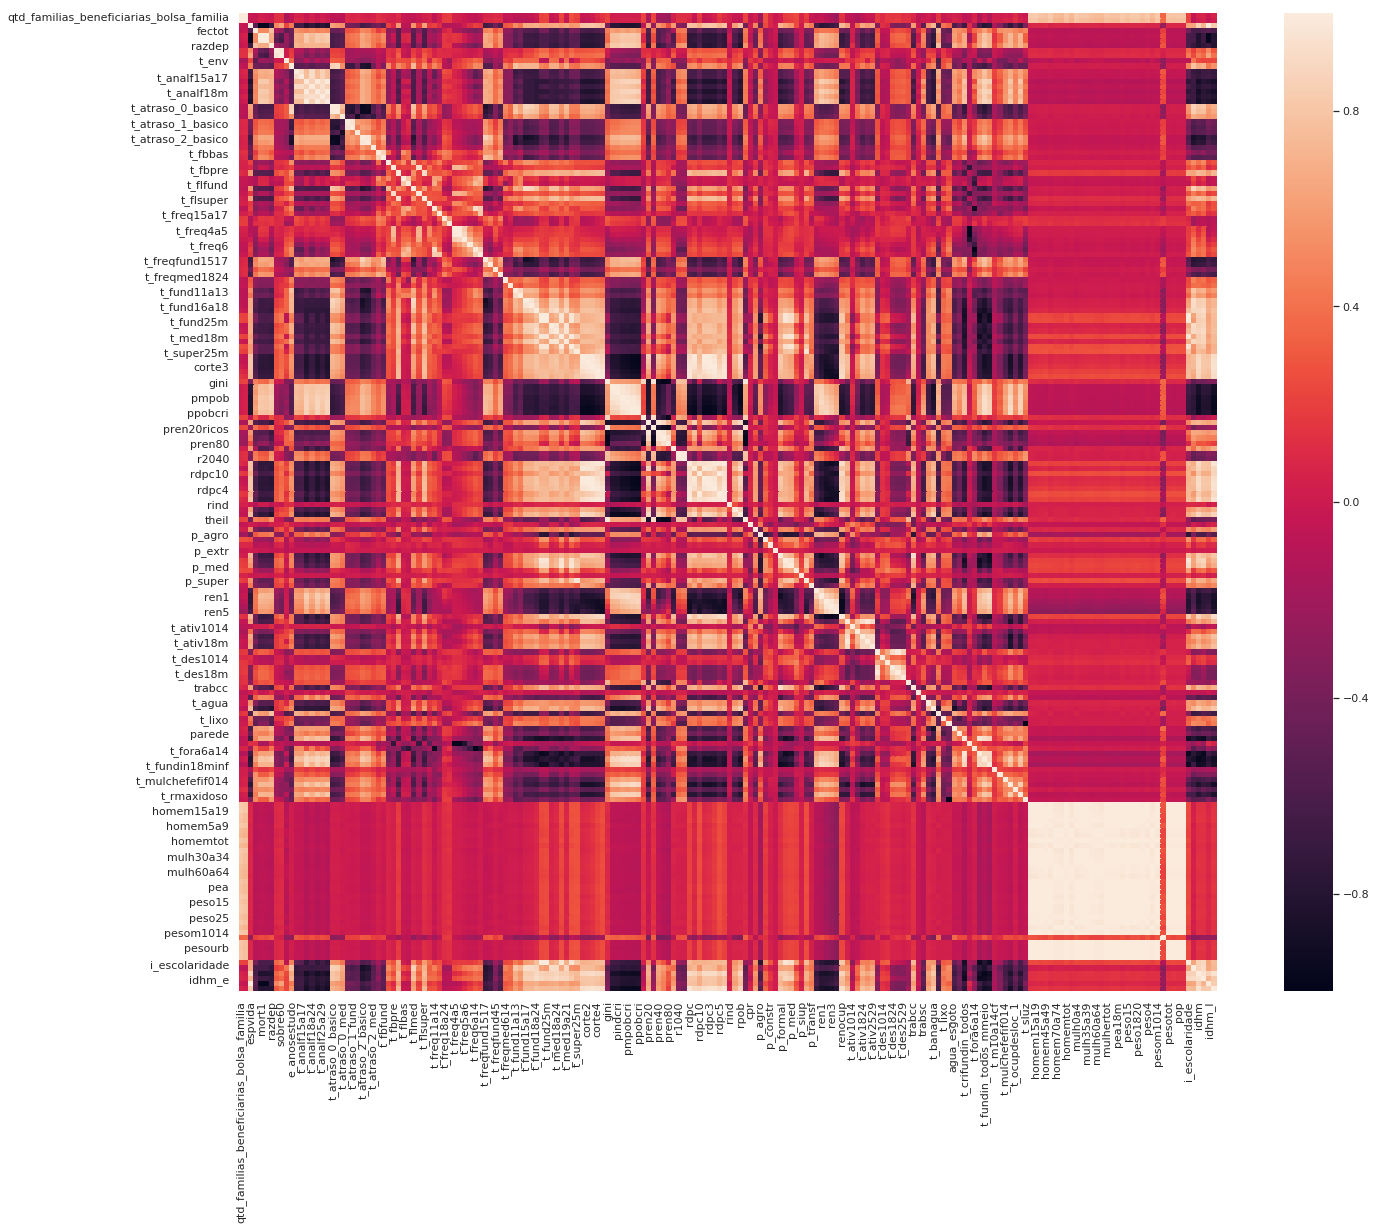

In [256]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

In [257]:
data_clean = data_clean.drop(columns=['homem45a49', 'mulh35a39', 'peso1524', 'pesom1014', 'popt'], axis = 1)

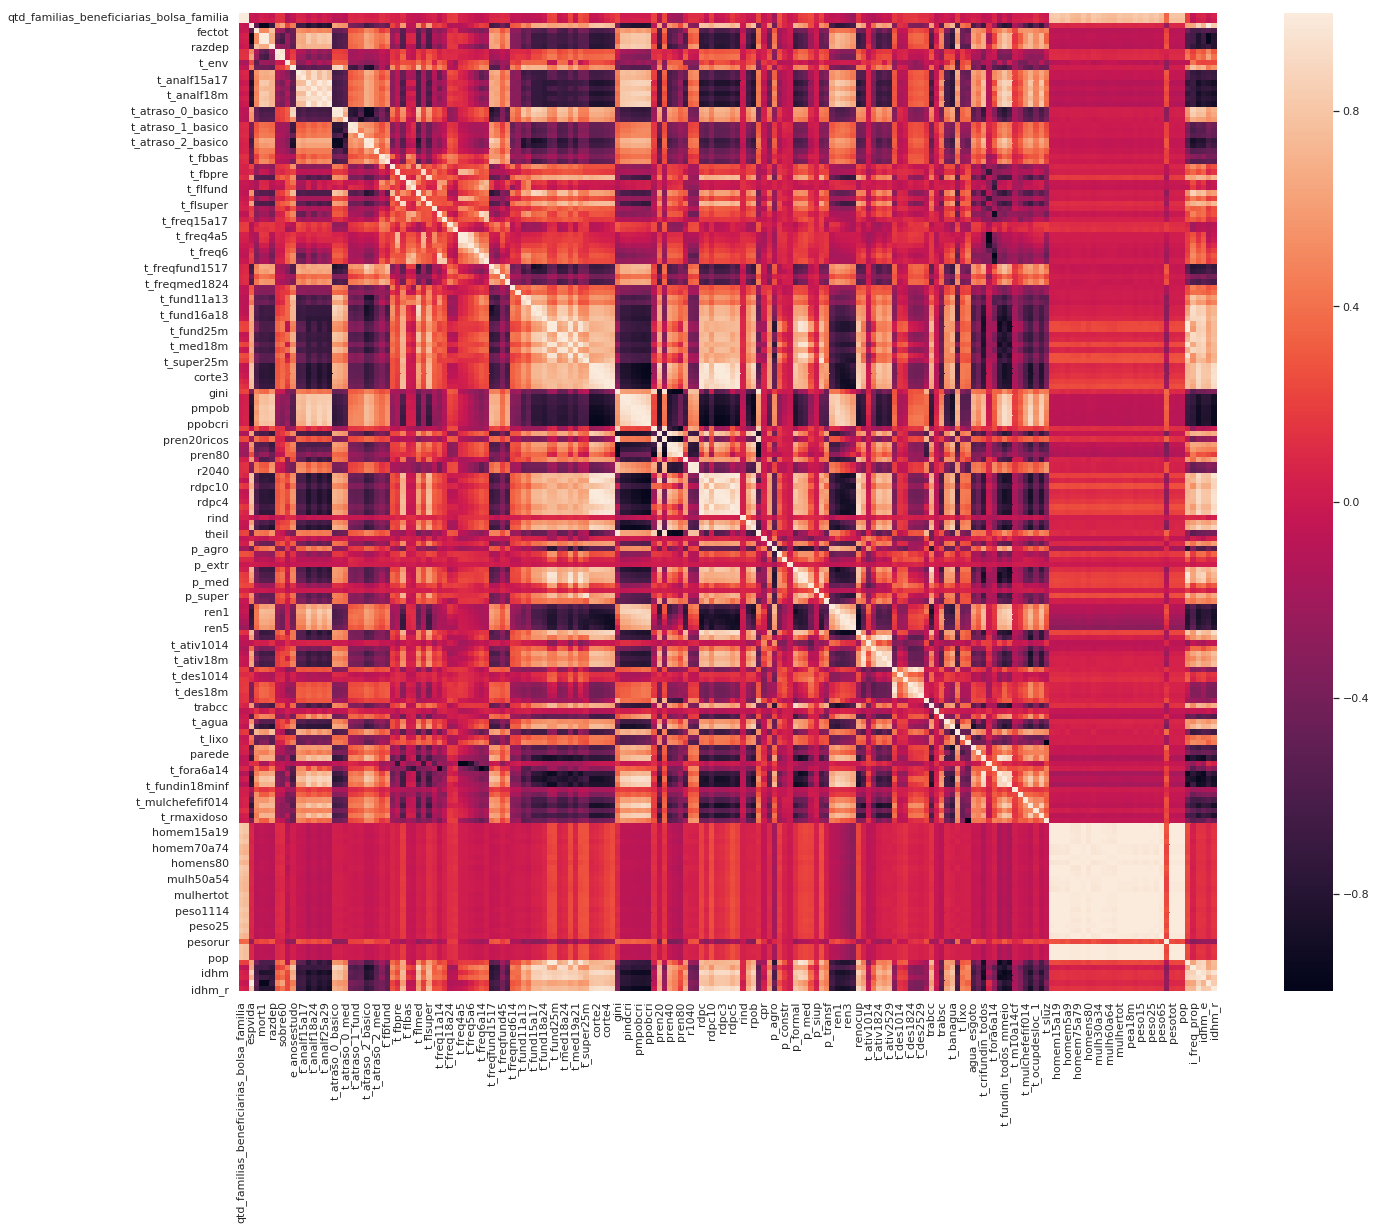

In [258]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=1, square=True);

In [259]:
data_clean = data_clean.drop(columns=['homem70a74', 'homens80', 'peso25'], axis = 1)

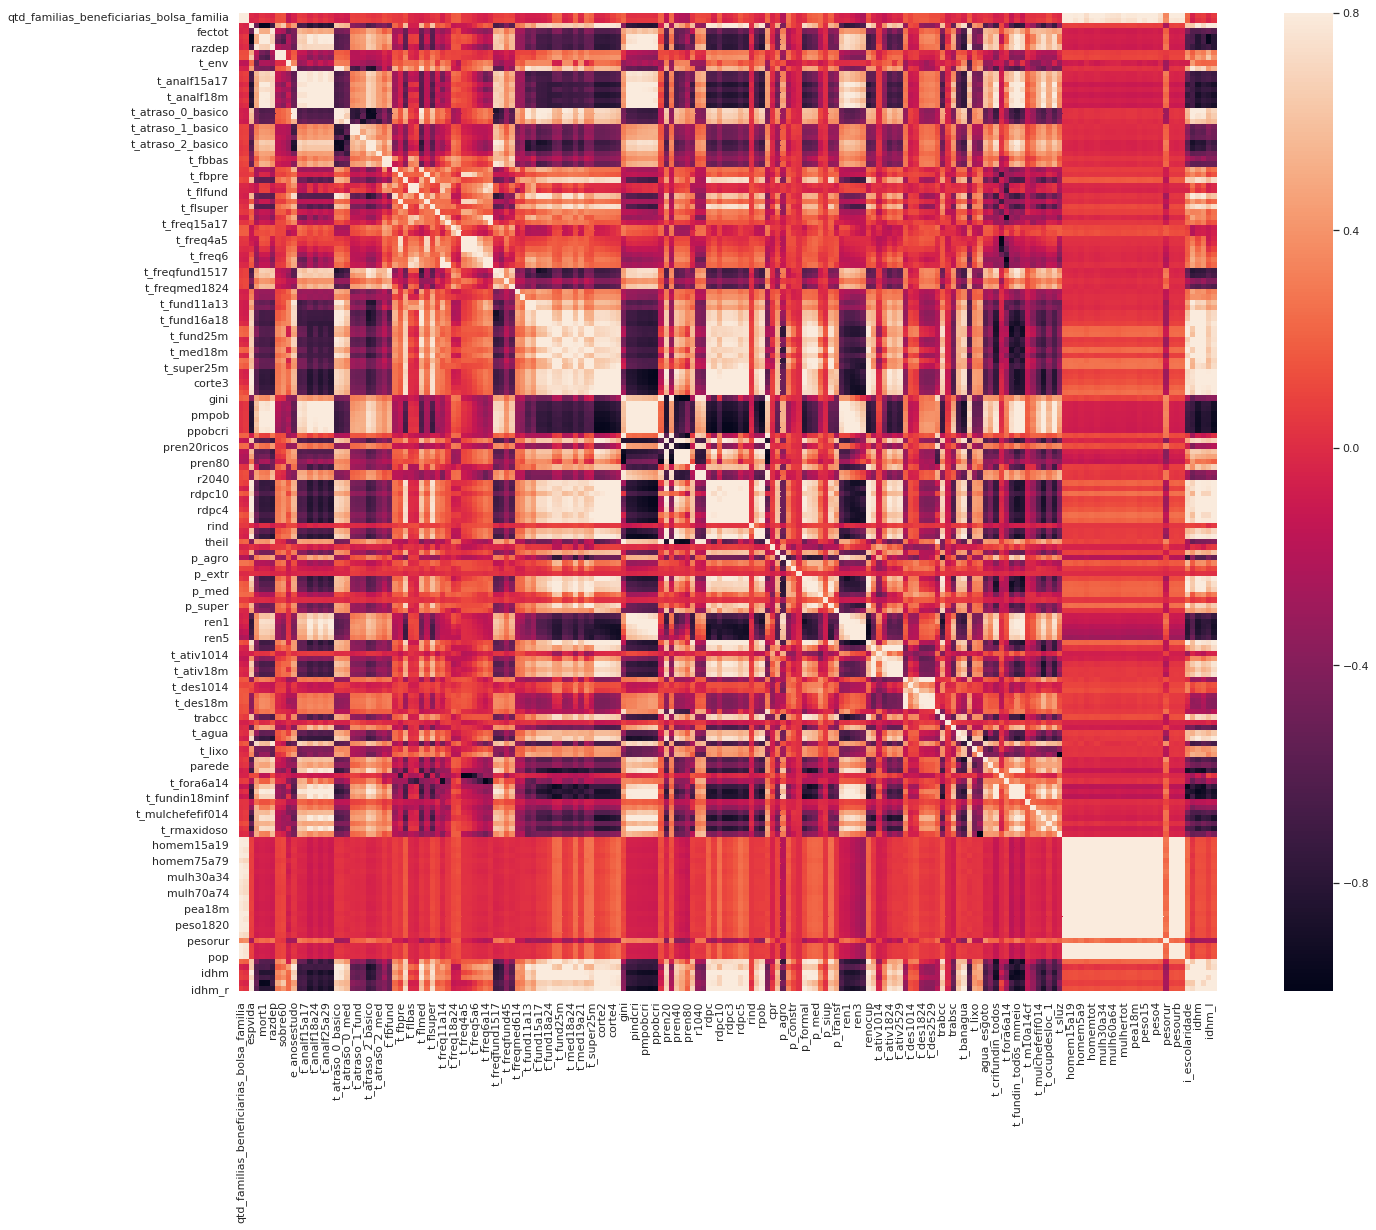

In [260]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, square=True);

In [261]:
data_clean = data_clean.drop(columns=['t_analf15a17', 't_analf18a24', 'pindcri', 'pmpobcri', 'ppobcri', 'rdpc10', 'rdpc3', 'rdpc5', 'ren1', 'ren3'], axis = 1)

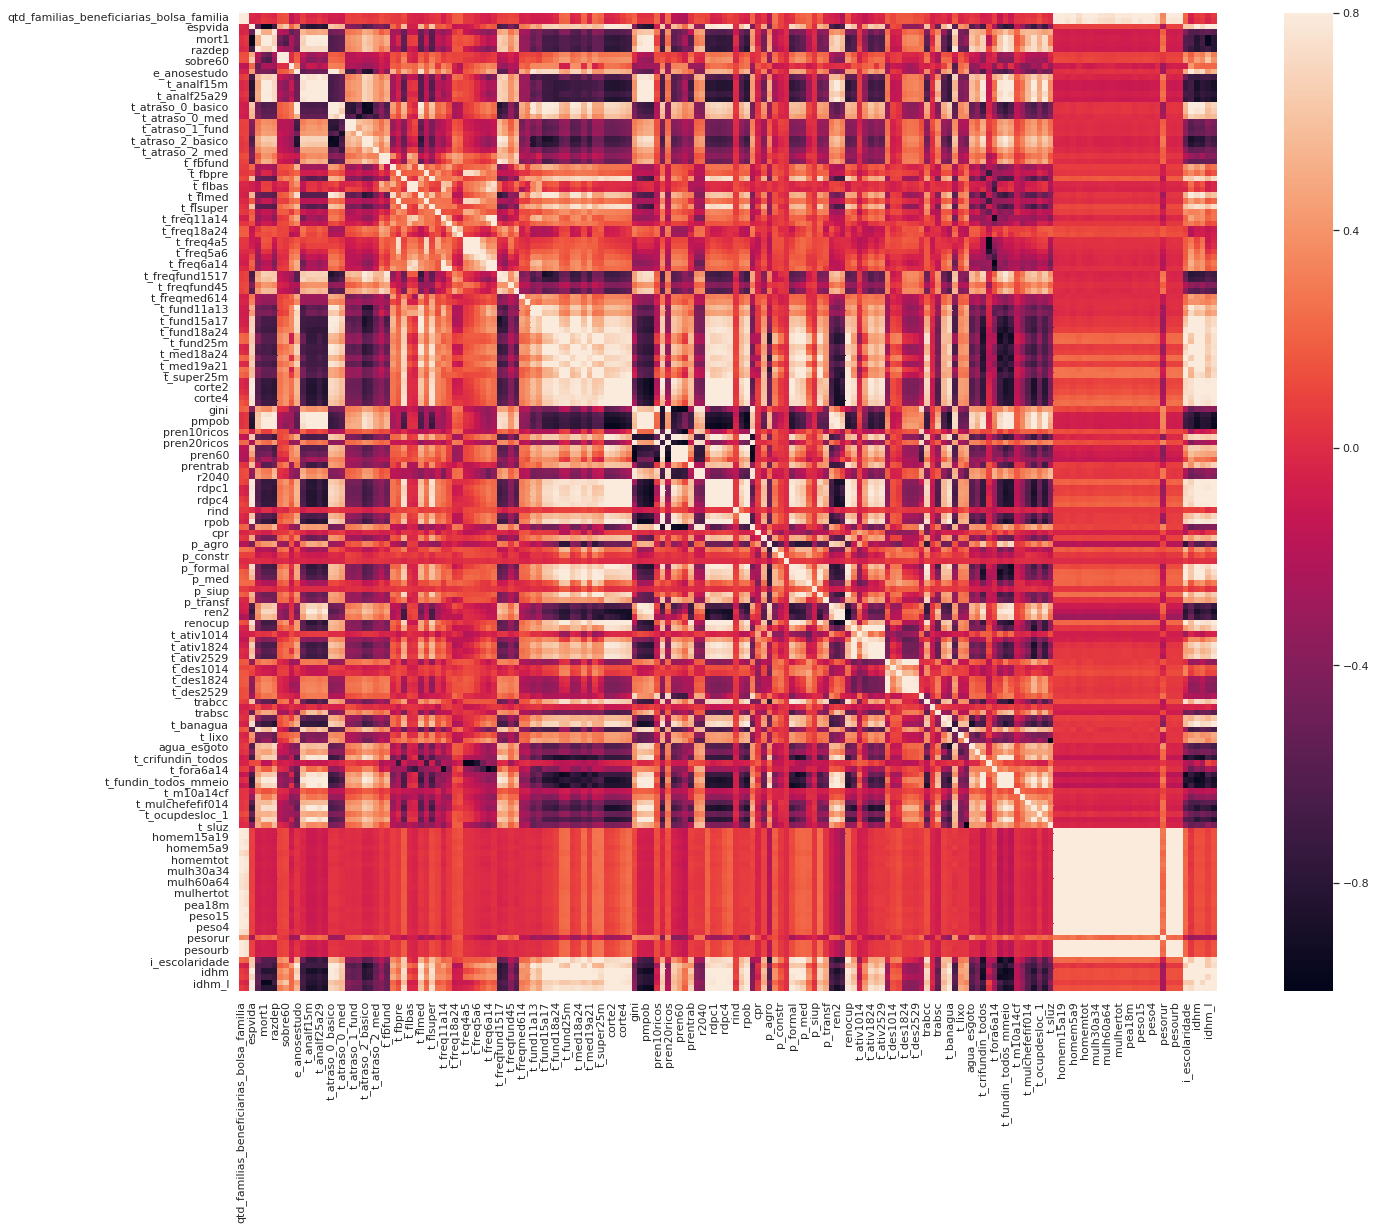

In [262]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Revendo as variáveis mais significativas

Como forma de confirmar as variáveis mais significativas e acompanhar após as remoções

In [263]:
y = data_clean['valor_repassado_bolsa_familia']
X = data_clean.drop(columns=['qtd_familias_beneficiarias_bolsa_familia','valor_repassado_bolsa_familia' ])

bestfeatures = SelectKBest(score_func=chi2, k=155)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(155,'Score')) 

                 Specs         Score
164            pesourb  7.815349e+09
163            pesotot  6.695882e+09
165                pop  6.639863e+09
158             peso15  5.524917e+09
155                pea  3.781480e+09
156             pea18m  3.730309e+09
154          mulhertot  3.642771e+09
148           homemtot  3.061339e+09
161             peso65  6.212915e+08
157           peso1114  3.610948e+08
150          mulh30a34  3.434425e+08
159           peso1820  2.936005e+08
145         homem35a39  2.572344e+08
151          mulh50a54  2.536853e+08
144         homem15a19  2.233980e+08
146           homem5a9  2.003717e+08
143           homem0a4  1.911329e+08
149            mulh0a4  1.849703e+08
152          mulh60a64  1.690270e+08
153          mulh70a74  1.027116e+08
160              peso4  7.624231e+07
162            pesorur  4.573059e+07
147         homem75a79  3.955050e+07
67              corte9  1.141184e+06
106            renocup  8.271471e+05
66              corte4  6.900327e+05
8

Visualizando agora as 6 variáveis mais significativas em gráfico em relação às variáveis-alvo: "valor_repassado_bolsa_familia" e "qtd_familias_beneficiarias_bolsa_familia"

Foi utilizada a biblioteca Seaborn

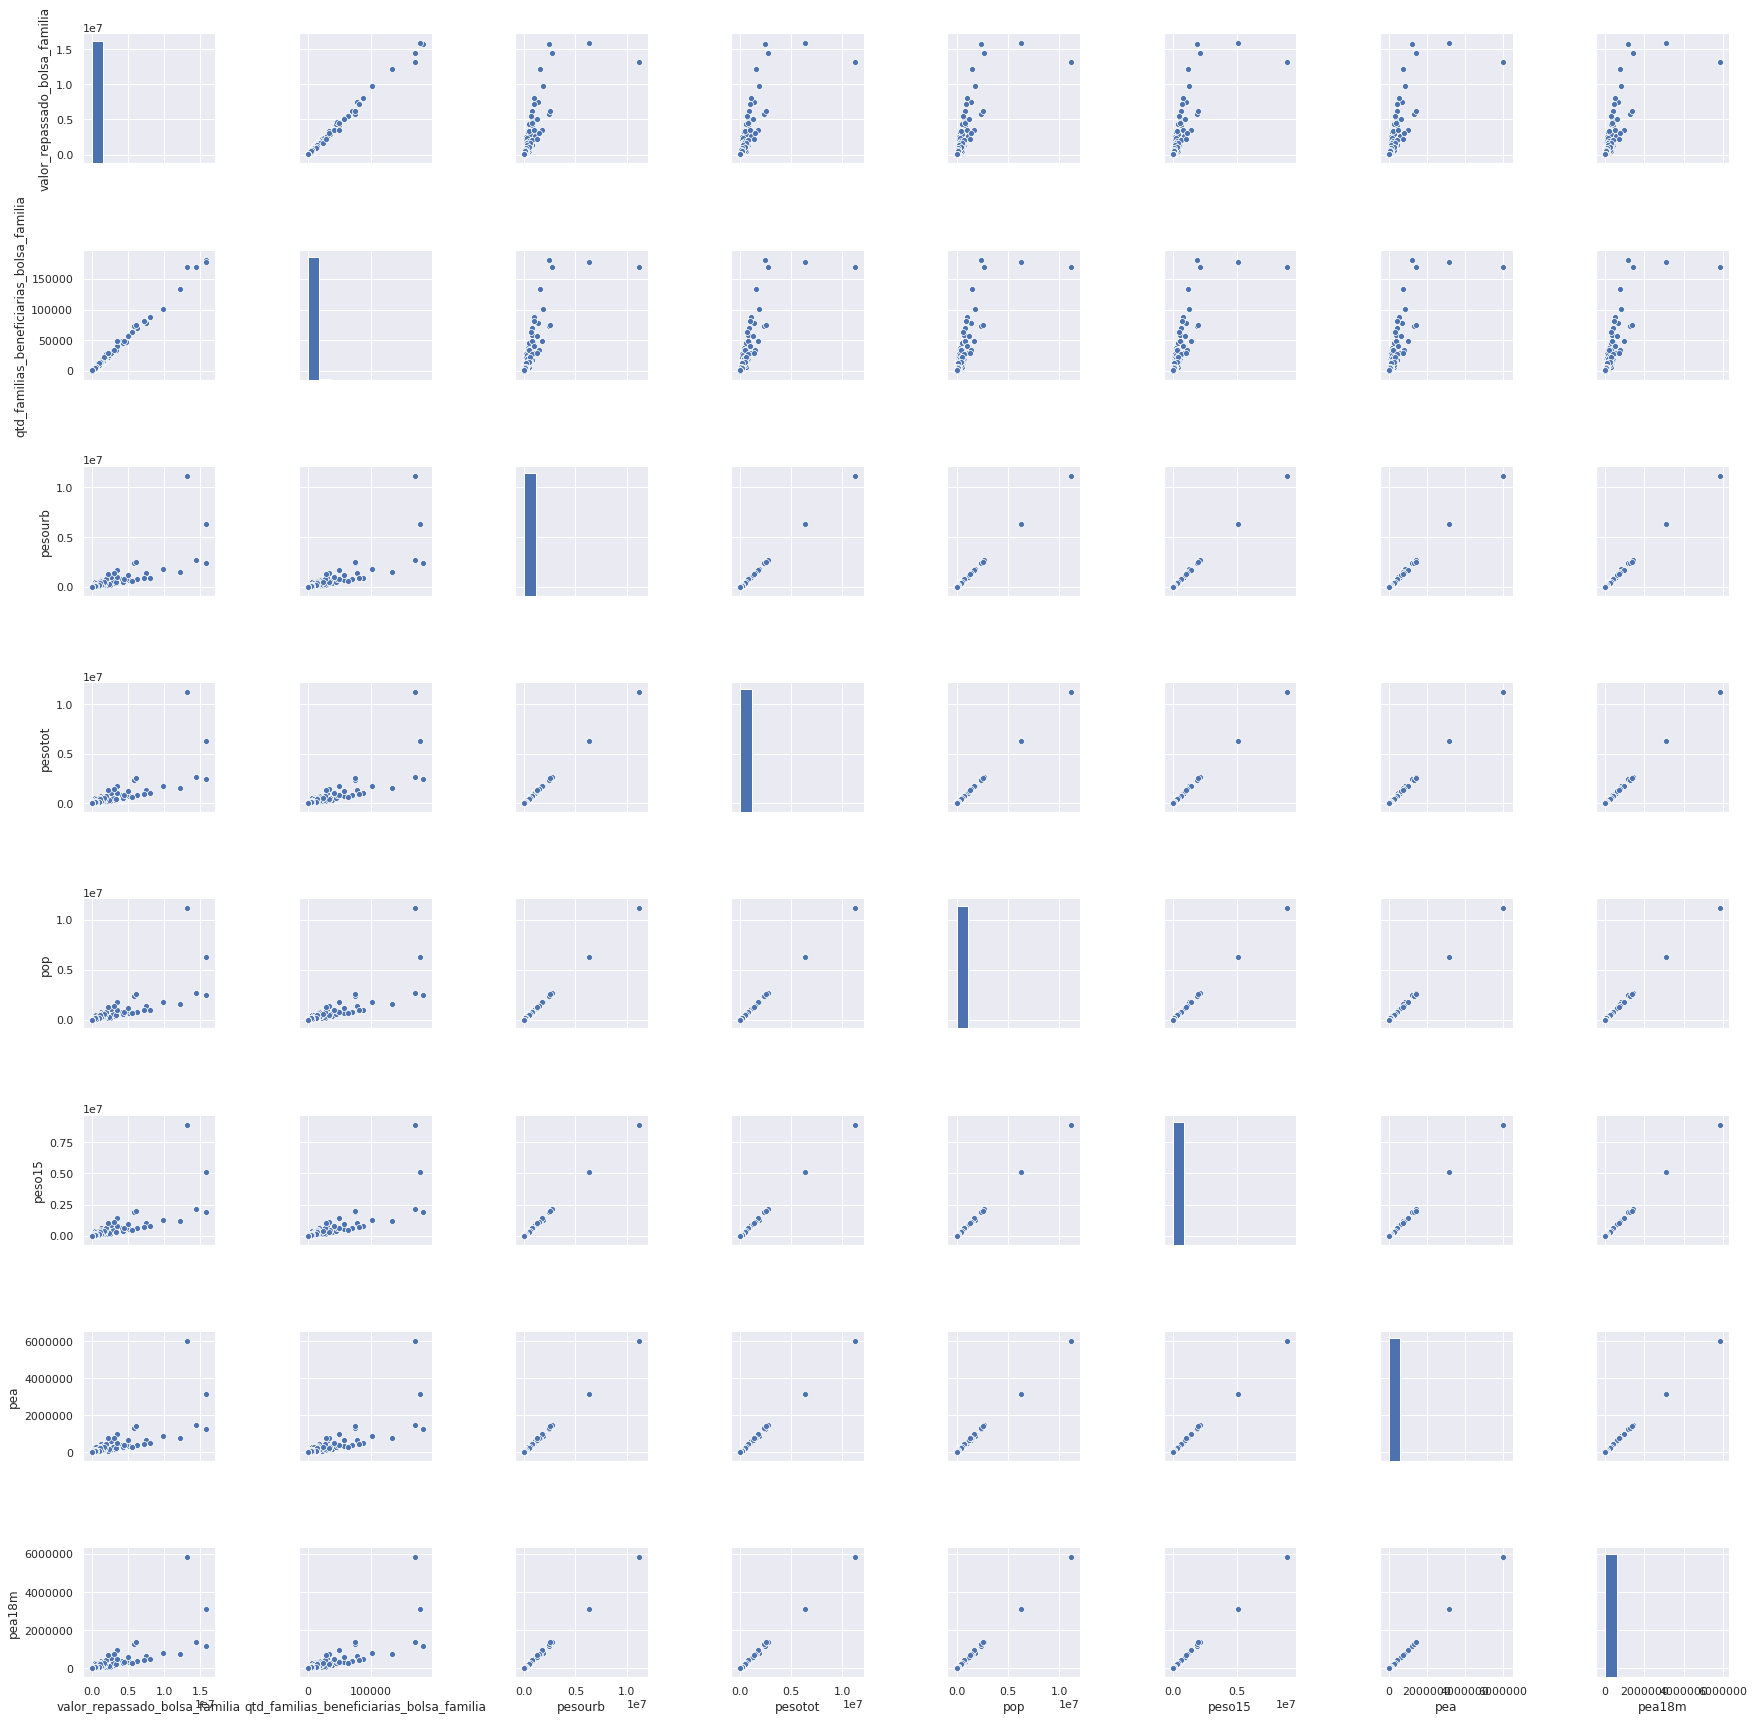

In [264]:
#scatterplot
sns.set()
cols = ['valor_repassado_bolsa_familia', 'qtd_familias_beneficiarias_bolsa_familia', 'pesourb', 'pesotot', 'pop', 'peso15','pea','pea18m']
sns.pairplot(data_clean[cols], height = 3)
plt.show();

Os gráficos acima confirmam a relação ainda muito forte entre as variáveis

Por fim, foi utilizado abaixo um algoritmo de verificação de existência de valores nulos.

In [265]:
#missing data
total = data_clean.isnull().sum().sort_values(ascending=False)
percent = (data_clean.isnull().sum()/data_clean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
idhm_r,0,0.0
t_fund15a17,0,0.0
t_med19a21,0,0.0
t_med18m,0,0.0
t_med18a24,0,0.0
t_med18a20,0,0.0
t_fund25m,0,0.0
t_fund18m,0,0.0
t_fund18a24,0,0.0
t_fund16a18,0,0.0


### Preparação e execução de modelos

Abaixo, vamos inicialmente separar nosso dataset em conjunto de treinamento de conjunto de teste para, em seguida, iniciar a instanciação dos modelos e sua respectiva verificação de hyper-parâmetros

#### Separando os conjuntos de dados de treinamento e teste

In [166]:
y = data_clean['valor_repassado_bolsa_familia']
X = data_clean.drop(columns=['qtd_familias_beneficiarias_bolsa_familia','valor_repassado_bolsa_familia' ])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

A cada modelo, seguirá a utilização dos métodos fit e predict
Em seguida, a verificação do score, comparando com os dados de teste
Por fim, a visualização em gráfico do resultado das predições

#### LinearRegression

0.9201716765529273


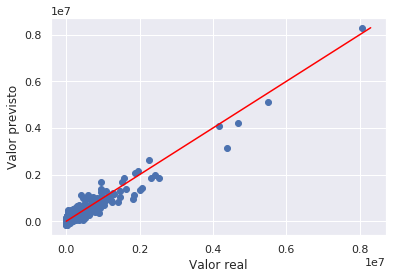

In [167]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_predicted1 = model1.predict(X_test)

print(model1.score(X_test,y_test))

%matplotlib inline

plt.scatter(y_test, y_predicted1)
range = [y_test.min(), y_predicted1.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

A otimização dos modelos utiliza GridSearch da biblioteca scikit-learn com a verificação de diversos hyper-parâmetros.
Em seguida, os parâmetros finais são impressos, assim como o score final, que é o maior score dentre os parâmetros utilizados

#### Otimizando o modelo LinearRegression

In [199]:
parameters = {'fit_intercept':('True', 'False')}

modelX = LinearRegression()
clf = GridSearchCV(modelX, parameters)
clf.fit(X_train, y_train)
print(clf.get_params())
print(clf.score(X_test,y_test))

{'cv': 'warn', 'error_score': 'raise-deprecating', 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__n_jobs': None, 'estimator__normalize': False, 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'fit_intercept': ('True', 'False')}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}
0.9201716765529273


/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


#### DecisionTreeRegressor

0.8871603415449428


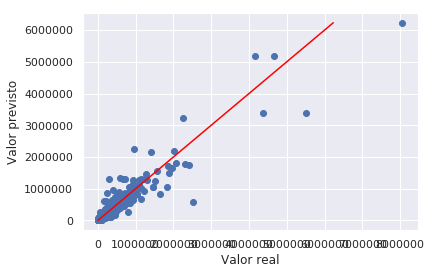

In [189]:
model2 = DecisionTreeRegressor(random_state=100)
model2.fit(X_train, y_train)

y_predicted2 = model2.predict(X_test)

print(model2.score(X_test,y_test))

plt.scatter(y_test, y_predicted2)
range = [y_test.min(), y_predicted2.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### Otimizando o modelo DecisionTreeRegressor

In [202]:
parameters = {'criterion':('mse','friedman_mse','mae'),'splitter':('best','random'),'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[1,5,10]}

modelX = DecisionTreeRegressor(random_state=100)
clf = GridSearchCV(modelX, param_grid = parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.get_params())
print(clf.score(X_test,y_test))

{'cv': 5, 'error_score': 'raise-deprecating', 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': False, 'estimator__random_state': 100, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'criterion': ('mse', 'friedman_mse', 'mae'), 'splitter': ('best', 'random'), 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 5, 10]},

/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [110]:
feature_labels = X_train.columns
importance = model2.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

t_fora6a14-0.00%
t_atraso_2_fund-0.00%
pren60-0.00%
t_med18m-0.00%
t_atraso_2_basico-0.00%
pren40-0.00%
gini-0.00%
r2040-0.00%
t_med25m-0.00%
t_ativ18m-0.00%
r1040-0.00%
t_freq18a24-0.00%
t_freq6a17-0.00%
p_agro-0.00%
t_dens-0.00%
t_fund11a13-0.00%
i_freq_prop-0.00%
p_serv-0.00%
t_atraso_1_basico-0.00%
t_m10a14cf-0.00%
p_constr-0.00%
t_med18a20-0.00%
p_fund-0.00%
idhm-0.00%
t_flbas-0.00%
i_escolaridade-0.00%
t_ocupdesloc_1-0.00%
t_freq0a3-0.00%
idhm_r-0.00%
rdpc-0.00%
t_fund25m-0.00%
corte4-0.00%
t_fund15a17-0.00%
t_freqmed614-0.00%
t_atraso_2_med-0.00%
corte9-0.00%
t_des1824-0.00%
t_fbfund-0.00%
t_des-0.00%
idhm_e-0.00%
t_freqfund1517-0.00%
t_env-0.00%
t_nestuda_ntrab_mmeio-0.00%
pea18m-0.00%
pren80-0.00%
sobre60-0.00%
t_med18a24-0.00%
t_fundin_todos-0.00%
rdpct-0.00%
fectot-0.00%
t_luz-0.00%
t_super25m-0.00%
t_fund16a18-0.00%
t_mulchefefif014-0.00%
t_freq15a17-0.00%
t_crifundin_todos-0.00%
pind-0.00%
t_flpre-0.00%
t_ativ1517-0.00%
t_freqfund1824-0.00%
t_fundin18minf-0.00%
cpr-0.00%
t

#### RandomForestRegressor

/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9341679555451049


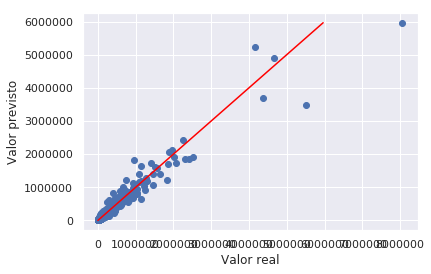

In [206]:
model4 = RandomForestRegressor(random_state=1)
model4.fit(X_train, y_train)

y_predicted4 = model4.predict(X_test)

print(model4.score(X_test,y_test))

plt.scatter(y_test, y_predicted4)
range = [y_test.min(), y_predicted4.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### Otimizando o modelo RandomForestRegressor

In [214]:
parameters = {'n_estimators':[10,15], 'criterion':('mse','friedman_mse','mae'),'min_samples_split':[2,4],'min_samples_leaf':[1,5]}

modelX = RandomForestRegressor(random_state=1)
clf = GridSearchCV(modelX, param_grid = parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.get_params())
print(clf.score(X_test,y_test))

{'cv': 5, 'error_score': 'raise-deprecating', 'estimator__bootstrap': True, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 'warn', 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False), 'fit_params': None,

In [111]:
feature_labels = X_train.columns
importance = model4.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

t_med18m-0.00%
idhm_r-0.00%
t_fund18a24-0.00%
t_fbsuper-0.00%
pren40-0.00%
e_anosestudo-0.00%
r2040-0.00%
t_atraso_0_med-0.00%
t_med18a24-0.00%
t_atraso_2_fund-0.00%
t_fund18m-0.00%
t_freqmed614-0.00%
ren0-0.00%
r1040-0.00%
t_atraso_0_fund-0.00%
rind-0.00%
idhm-0.00%
p_fund-0.00%
t_fund25m-0.00%
idhm_e-0.00%
t_freq6a17-0.00%
t_flsuper-0.00%
t_freq6a14-0.00%
t_freq5a6-0.00%
p_med-0.00%
t_freqfund1517-0.00%
t_atraso_1_basico-0.00%
rdpc-0.00%
ren5-0.00%
t_atraso_2_basico-0.00%
t_ativ2529-0.00%
agua_esgoto-0.00%
t_banagua-0.00%
t_super25m-0.00%
t_med19a21-0.00%
corte9-0.00%
theiltrab-0.00%
t_freq18a24-0.00%
p_super-0.00%
t_freq4a6-0.00%
parede-0.00%
t_flpre-0.01%
t_fbbas-0.01%
pren20-0.01%
espvida-0.01%
t_fund11a13-0.01%
t_fundin_todos-0.01%
t_fbfund-0.01%
trabcc-0.01%
t_m15a17cf-0.01%
p_constr-0.01%
rmpob-0.01%
t_flfund-0.01%
i_freq_prop-0.01%
t_freq0a3-0.01%
t_flbas-0.01%
t_freqmed1824-0.01%
t_ativ1014-0.01%
t_fora4a5-0.01%
cpr-0.01%
mort5-0.01%
p_transf-0.01%
idhm_l-0.01%
renocup-0.01%


#### HuberRegressor

0.9200642641661478


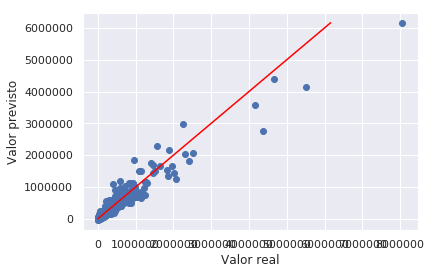

In [210]:
model6 = HuberRegressor()
model6.fit(X_train, y_train)

y_predicted6 = model6.predict(X_test)

print(model6.score(X_test,y_test))

plt.scatter(y_test, y_predicted6)
range = [y_test.min(), y_predicted6.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### Otimizando o modelo HuberRegressor

In [211]:
parameters = {'epsilon':[1.0, 1.2, 1.35,1.5], 'max_iter':[100,200,500],'alpha':[.0001,.0002,.001],'fit_intercept':('True', 'False')}

modelX = HuberRegressor()
clf = GridSearchCV(modelX, param_grid = parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.get_params())
print(clf.score(X_test,y_test))

{'cv': 5, 'error_score': 'raise-deprecating', 'estimator__alpha': 0.0001, 'estimator__epsilon': 1.35, 'estimator__fit_intercept': True, 'estimator__max_iter': 100, 'estimator__tol': 1e-05, 'estimator__warm_start': False, 'estimator': HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'epsilon': [1.0, 1.1, 1.2, 1.35, 1.5], 'max_iter': [100, 200, 500], 'alpha': [0.0001, 0.0002, 0.001, 0.01], 'fit_intercept': ('True', 'False')}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}
0.9191062394296777


#### SVM: LinearSVR

0.893892673637806


/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


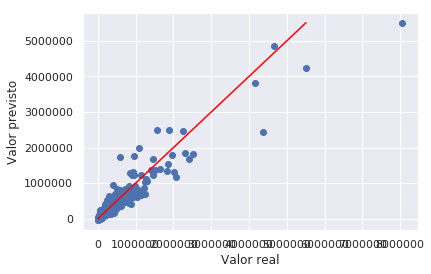

In [212]:
model7 = LinearSVR(random_state=1)
model7.fit(X_train, y_train)

y_predicted7 = model7.predict(X_test)

print(model7.score(X_test,y_test))

plt.scatter(y_test, y_predicted7)
range = [y_test.min(), y_predicted7.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### Otimizando o modelo SVM

In [213]:
parameters = {'loss':('epsilon_insensitive', 'squared_epsilon_insensitive'), 'C':[1, 10], 'max_iter':[1000, 10000]}

clf = GridSearchCV(model7, parameters)
clf.fit(X_train, y_train)
print(clf.get_params())
print(clf.score(X_test,y_test))

/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: Con

{'cv': 'warn', 'error_score': 'raise-deprecating', 'estimator__C': 1.0, 'estimator__dual': True, 'estimator__epsilon': 0.0, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1.0, 'estimator__loss': 'epsilon_insensitive', 'estimator__max_iter': 1000, 'estimator__random_state': 1, 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator': LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=1, tol=0.0001, verbose=0), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'loss': ('epsilon_insensitive', 'squared_epsilon_insensitive'), 'C': [1, 10], 'max_iter': [1000, 10000], 'random_state': [1]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}
0.9000703889246101


/home/helton/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Verificação final

Como análise final, após a predição dos modelos, o modelo com maior score foi escolhido e verificado quais são os dois casos com maior diferença entre o valor previsto e o final. A hipótese é que esses seriam as duas cidades com maior diferença entre o padrão observado nas outras cidades e o valor repassado final

In [216]:
x = 0
maior = 0
segundo_maior = 0

for i in y_test :
    if (maior < (i - y_predicted4[x])) and (y_predicted4[x] > 0):
        maior = i - y_predicted4[x]
        ponto = i
        previsto = y_predicted4[x]

    else:
        if (segundo_maior < (i - y_predicted4[x])) and (y_predicted4[x] > 0):
            segundo_maior = i - y_predicted4[x]
            segundo_ponto = i
            segundo_previsto = y_predicted4[x]

    #print("%d - %f | | %f || diferença = %f" % (x, y_predicted1[x], i, (i - y_predicted1[x])))
    x += 1
    
print(maior)
print(ponto)
print(previsto)

print(segundo_maior)
print(segundo_ponto)
print(segundo_previsto)

2095649.0999999996
8058820.0
5963170.9
616087.7
2526322.0
1910234.3


Os dois pontos observados correspondem às cidades de São Luís-MA e Porto Velho-RO.